In [1]:
#분류문제
#분석 데이터 검토
import pandas as pd
data = pd.read_csv("breast-cancer-wisconsin.csv",encoding = 'utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
#유방암 비율 확인
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [3]:
#행 열 구조 확인
print(data.shape)

(683, 11)


In [9]:
#특성(x)과 레이블 (y)나누기

#1. 특성이름으로 특성 데이터 셋 나누기
X1 = data[['Clump_Thickness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]

#2.특성 위치값으로 특성 데이터셋 나누기
X2 = data[data.columns[1:10]]

#3.loc함수(특성이 연달아 있어야함)
X3 = data.loc[:,'Clump_Thickness':'Mitoses']

In [10]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [11]:
y = data[["Class"]]

#[[]] 두번해야 데이터프레임 형태

In [12]:
print(y.shape)

(683, 1)


In [14]:
#train/test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,stratify = y,random_state = 42)

In [15]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [16]:
#정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [17]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

#최대가 1 최소가 0

In [20]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

#평균이 0 표준편차가 1

In [21]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


In [24]:
#모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train,y_train)

C:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [25]:
#모델 정확도 확인
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,y_train)

0.97265625

In [26]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.9590643274853801

In [28]:
#혼동행렬

from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n",confusion_train)

훈련데이터 오차행렬:
 [[328   5]
 [  9 170]]


In [29]:
#테스트데이터의 오차행렬

confusion_test = confusion_matrix(y_test,pred_test)
print("테스트데이터 오차행렬:\n",confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [30]:
#평가지표 확인

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train,pred_train)
print("분류예측 레포트:\n",cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [32]:
#테스트데이터의 평가지표
from sklearn.metrics import classification_report
cfreport_test = classification_report(y_test,pred_test)
print("테스트데이터 분류예측 리포트:\n",cfreport_test)

테스트데이터 분류예측 리포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [33]:
#ROC 지표
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

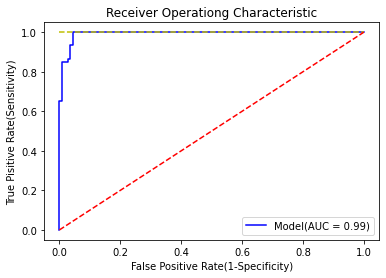

In [34]:
#ROC Curve
import matplotlib.pyplot as plt
plt.title('Receiver Operationg Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Pisitive Rate(Sensitivity)')

plt.plot(false_positive_rate,true_positive_rate,'b',label = 'Model(AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [35]:
#예측값 병합 및 저장

#예측확률 컬럼을 생성하여 prob_train에 저장
prob_train = model.predict_proba(X_scaled_minmax_train)

#이미 진행한 예측 범주를 ytrain 데이터셋에 y_pred변수 컬럼에 추가
y_train[['y_pred']] = pred_train

#확률은 두개 변수가 생성되므로 이를 각각 prob0와 prob1에 저장
y_train[['y_prob0','y_prob1']] = prob_train
y_train

<ipython-input-35-6d5cb29995a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']] = pred_train
C:\Users\suhye\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-35-6d5cb29995a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [37]:
#테스트데이터 예측갑 병합 및 저장
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test[['y_prob0','y_prob1']] = prob_test
y_test

<ipython-input-37-cf60f677e9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']] = pred_test
C:\Users\suhye\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-37-cf60f677e9c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [38]:
#두 데이터셋 병합(테스트 데이터의 특성치와 예측치)

Total_test = pd.concat([X_test,y_test],axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [39]:
#csv파일로 내보내기 및 저장
Total_test.to_csv("classification_test.csv")